# 15_DL from scratch - 예제 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline

In [2]:
# Feature data
X = np.zeros((5,5,5))

X[:, :, 0] = [ [0,1,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0] ]
X[:, :, 1] = [ [1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [1,0,0,0,0], [1,1,1,1,1] ]
X[:, :, 2] = [ [1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0] ]
X[:, :, 3] = [ [0,0,0,1,0], [0,0,1,1,0], [0,1,0,1,0], [1,1,1,1,1], [0,0,0,1,0] ]
X[:, :, 4] = [ [1,1,1,1,1], [1,0,0,0,0], [1,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0] ]


In [3]:
# Labels
D = np.array([
    [[1,0,0,0,0]], [[0,1,0,0,0]], [[0,0,1,0,0]], [[0,0,0,1,0]], [[0,0,0,0,1]]
])


In [4]:
def Softmax(x):
    x = np.subtract(x, np.max(x))
    ex = np.exp(x)

    return ex / np.sum(ex)

In [5]:
def ReLU(x):
    return np.maximum(0, x)

![](./lecture_image/09-01.png)

In [6]:
# 정방향 계산
def calcOutput_ReLU(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)
    
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)

    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)

    v = np.matmul(W4, y3)
    y = Softmax(v)

    return y, v1, v2, v3, y1, y2, y3

In [7]:
# 역전파
def backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e       # 크로스엔트로피

    e3 = np.matmul(W4.T, delta)
    delta3 = (v3 > 0) * e3

    e2 = np.matmul(W3.T, delta3)
    delta2 = (v2 > 0) * e2

    e1 = np.matmul(W2.T, delta2)
    delta1 = (v1 > 0) * e1

    return delta, delta1, delta2, delta3

![크로스엔트로피](./lecture_image/12-03.png)

In [8]:
# 가중치 계산
def calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4):
    dW4 = alpha * delta * y3.T
    W4 = W4 + dW4

    dW3 = alpha * delta3 * y2.T
    W3 = W3 + dW3

    dW2 = alpha * delta2 * y1.T
    W2 = W2 + dW2

    dW1 = alpha * delta1 * x.T
    W1 = W1 + dW1

    return W1, W2, W3, W4

In [9]:
# 가중치 업데이트
def DeepReLU(W1, W2, W3, W4, X, D, alpha):
    for k in range(5):
                # 5 : 다섯개의 데이터를 찾는 것이기 때문에.
        x = np.reshape(X[:, :, k], (25,1))
        d = D[k, :].T

        y, v1, v2, v3, y1, y2, y3 = calcOutput_ReLU(W1, W2, W3, W4, x)
        delta, delta1, delta2, delta3 = backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3)
        W1, W2, W3, W4 = calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)

    return W1, W2, W3, W4

In [10]:
# 가중치 랜덤하게 설정
W1 = 2 * np.random.random((20, 25)) - 1
W2 = 2 * np.random.random((20, 20)) - 1
W3 = 2 * np.random.random((20, 20)) - 1
W4 = 2 * np.random.random((5, 20)) - 1

alpha = 0.01

for epoch in tqdm(range(10000)):
    W1, W2, W3, W4 = DeepReLU(W1, W2, W3, W4, X, D, alpha)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [11]:
def verify_algorithm(x, W1, W2, W3, W4):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)

    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)

    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)

    v = np.matmul(W4, y3)
    y = Softmax(v)

    return y

In [12]:
N = 5
for k in range(N):
    x = np.reshape(X[:,:,k], (25, 1))
    y = verify_algorithm(x, W1, W2, W3, W4)

    print('Y = {}:'.format(k+1))
    print(np.argmax(y, axis=0) + 1)     # 예측 값
            # argmax : Returns the indices of the maximum values along an axis.
    print(y)
    print('--------')

Y = 1:
[1]
[[9.99983952e-01]
 [6.02496956e-06]
 [7.48331687e-07]
 [9.27042979e-06]
 [4.33322394e-09]]
--------
Y = 2:
[2]
[[2.84433271e-06]
 [9.99978473e-01]
 [1.35678637e-05]
 [5.10863294e-06]
 [5.74523649e-09]]
--------
Y = 3:
[3]
[[3.76852082e-07]
 [2.78193020e-05]
 [9.99966528e-01]
 [1.04182918e-08]
 [5.26549608e-06]]
--------
Y = 4:
[4]
[[3.89047587e-06]
 [3.00823046e-06]
 [1.55795484e-07]
 [9.99987414e-01]
 [5.53149681e-06]]
--------
Y = 5:
[5]
[[5.91255360e-09]
 [9.30795566e-06]
 [1.27016476e-05]
 [6.24706377e-06]
 [9.99971737e-01]]
--------


# 테스트 데이터

In [13]:
X_test = np.zeros((5,5,5))

X_test[:,:,0] = [ [0,0,0,0,0], [0,1,0,0,0], [1,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0] ]
X_test[:,:,1] = [ [1,1,1,1,0], [0,0,0,0,0], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0] ]
X_test[:,:,2] = [ [0,0,0,1,0], [0,0,1,1,0], [0,1,0,0,0], [1,1,1,0,1], [0,0,0,1,0] ]
X_test[:,:,3] = [ [1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [1,0,0,0,0], [1,1,1,0,0] ]
X_test[:,:,4] = [ [0,1,1,1,1], [1,1,0,0,0], [1,1,1,1,0], [0,0,0,1,1], [1,1,1,1,0] ]

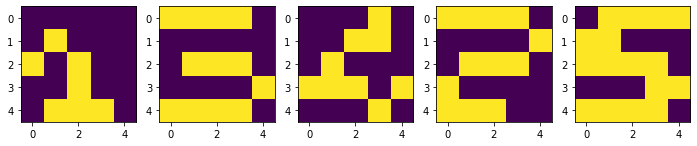

In [14]:
plt.figure(figsize=(12,4))
for n in range(5):
    plt.subplot(1,5,n+1)
    plt.imshow(X_test[:,:,n])
plt.show()

In [15]:
learning_result = [0,0,0,0,0]

for k in range(N):
    x = np.reshape(X_test[:,:,k], (25,1))
    y = verify_algorithm(x, W1, W2, W3, W4)

    learning_result[k] = np.argmax(y, axis=0) + 1
    
    print('Y = {}: '.format(k+1))
    print(np.argmax(y, axis=0) + 1)
    print(y)
    print('----------')

Y = 1: 
[2]
[[2.63611433e-03]
 [9.39160878e-01]
 [4.63743096e-02]
 [3.54586273e-04]
 [1.14741118e-02]]
----------
Y = 2: 
[5]
[[4.66523639e-05]
 [2.89649391e-02]
 [3.24052738e-03]
 [4.01343311e-02]
 [9.27613550e-01]]
----------
Y = 3: 
[4]
[[5.93725067e-04]
 [9.57995132e-06]
 [5.54022565e-06]
 [9.99370118e-01]
 [2.10368832e-05]]
----------
Y = 4: 
[3]
[[6.83328006e-04]
 [4.09393030e-02]
 [9.58364625e-01]
 [9.58797168e-07]
 [1.17852793e-05]]
----------
Y = 5: 
[5]
[[9.35748948e-05]
 [1.52135764e-04]
 [7.62357117e-03]
 [5.26837803e-03]
 [9.86862340e-01]]
----------


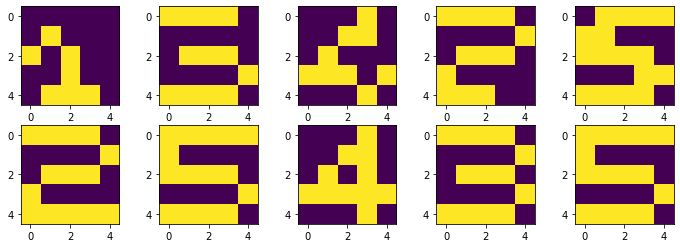

In [16]:
plt.figure(figsize=(12,4))
for k in range(5):
    plt.subplot(2,5,k+1)
    plt.imshow(X_test[:,:,k])
    plt.subplot(2, 5, k+6)
    plt.imshow(X[:,:,learning_result[k][0]-1])
plt.show()

-------------------
# Dropout 설명

In [ ]:
y = np.array([0.1, 0.2, 0.5, 0.8, 0.6, 0.4, 0.3, 1, 2, 3, 4])
y.size, y.size * (1- 0.8), round(y.size * (1-0.8))
# 11개 중에서
                # 80%를 꺼라

## 그 결과 2.199개 가 남음. ( round 하면 2 )

(11, 2.1999999999999993, 2)

In [ ]:
num = round(y.size * (1 - 0.8))
np.random.choice(y.size, num)

array([2, 8])

----------------

In [17]:
# dropout 함수
def Dropout(y, ratio):
    ym = np.zeros_like(y)

    num = round(y.size*(1-ratio))
    idx = np.random.choice(y.size, num, replace=False)
    ym[idx] = 1.0 / (1.0 - ratio)

    return ym

In [24]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [26]:
def calcOutput_Dropout(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    y1 = y1 * Dropout(y1, 0.2)
    
    v2 = np.matmul(W2, y1)
    y2 = sigmoid(v2)
    y2 = y2 * Dropout(y2, 0.2)

    v3 = np.matmul(W3, y2)
    y3 = sigmoid(v3)
    y3 = y3 * Dropout(y3, 0.2)

    v = np.matmul(W4, y3)
    y = Softmax(v)

    return y, v1, v2, v3, y1, y2, y3

In [30]:
def backpropagation_Dropout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e       # 크로스엔트로피

    e3 = np.matmul(W4.T, delta)
    delta3 = y3 * (1-y3) * e3

    e2 = np.matmul(W3.T, delta3)
    delta2 = y2 * (1-y2) * e2

    e1 = np.matmul(W2.T, delta2)
    delta1 = y1 * (1-y1) * e1

    return delta, delta1, delta2, delta3

In [33]:
# 가중치 업데이트
def DeepDropout(W1, W2, W3, W4, X, D, alpha):
    for k in range(5):
                # 5 : 다섯개의 데이터를 찾는 것이기 때문에.
        x = np.reshape(X[:, :, k], (25,1))
        d = D[k, :].T

        y, v1, v2, v3, y1, y2, y3 = calcOutput_Dropout(W1, W2, W3, W4, x)
        delta, delta1, delta2, delta3 = backpropagation_Dropout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3)
        W1, W2, W3, W4 = calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)

    return W1, W2, W3, W4

In [34]:
# 가중치 랜덤하게 설정
W1 = 2 * np.random.random((20, 25)) - 1
W2 = 2 * np.random.random((20, 20)) - 1
W3 = 2 * np.random.random((20, 20)) - 1
W4 = 2 * np.random.random((5, 20)) - 1

alpha = 0.01

for epoch in tqdm(range(10000)):
    W1, W2, W3, W4 = DeepDropout(W1, W2, W3, W4, X, D, alpha)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [37]:
learning_result = [0,0,0,0,0]

for k in range(N):
    x = np.reshape(X_test[:,:,k], (25,1))
    y = verify_algorithm(x, W1, W2, W3, W4)

    learning_result[k] = np.argmax(y, axis=0) + 1
    
    print('Y = {}: '.format(k+1))
    print(np.argmax(y, axis=0) + 1)
    print(y)
    print('----------')

Y = 1: 
[1]
[[1.00000000e+00]
 [8.73677233e-85]
 [3.03810928e-54]
 [5.86857151e-39]
 [6.43266539e-18]]
----------
Y = 2: 
[3]
[[0.12042702]
 [0.15039962]
 [0.64541806]
 [0.01618035]
 [0.06757495]]
----------
Y = 3: 
[4]
[[3.76684427e-23]
 [3.35751392e-34]
 [3.81276432e-86]
 [1.00000000e+00]
 [3.89043917e-87]]
----------
Y = 4: 
[4]
[[1.54496329e-06]
 [1.18574530e-01]
 [5.56079394e-04]
 [8.80066905e-01]
 [8.00941125e-04]]
----------
Y = 5: 
[5]
[[4.71859728e-27]
 [6.35664192e-58]
 [1.52623034e-40]
 [4.23408684e-35]
 [1.00000000e+00]]
----------


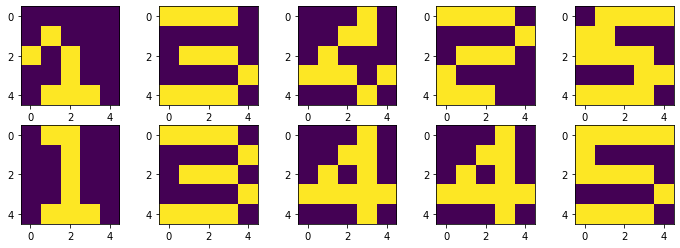

In [38]:
plt.figure(figsize=(12,4))
for k in range(5):
    plt.subplot(2,5,k+1)
    plt.imshow(X_test[:,:,k])
    plt.subplot(2, 5, k+6)
    plt.imshow(X[:,:,learning_result[k][0]-1])
plt.show()